### 8A_LR_SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

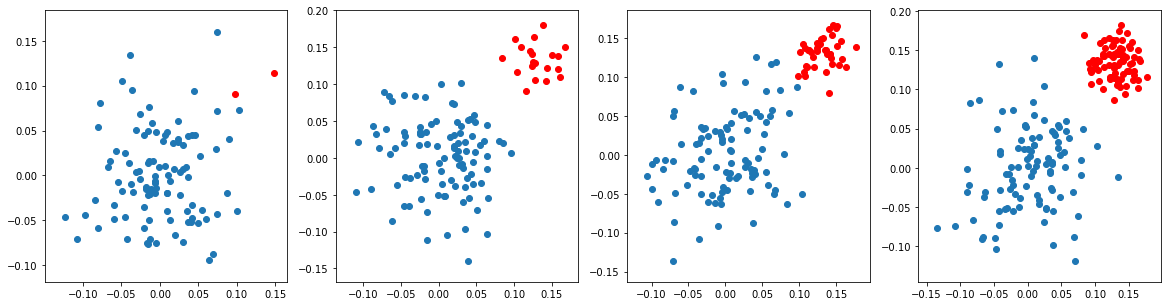

In [3]:
# here we are creating 2d imbalanced data points 
Xd_p,Xd_n,Yd_p,Yd_n,Xd,Yd = [],[],[],[],[],[]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    Xd_p.append(X_p)
    
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    Xd_n.append(X_n)
    
    y_p=np.array([1]*i[0]).reshape(-1,1)
    Yd_p.append(y_p)
        
    y_n=np.array([0]*i[1]).reshape(-1,1)
    Yd_n.append(y_n)
    
    X=np.vstack((X_p,X_n))
    Xd.append(X)
    
    y=np.vstack((y_p,y_n))
    Yd.append(y)
    
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

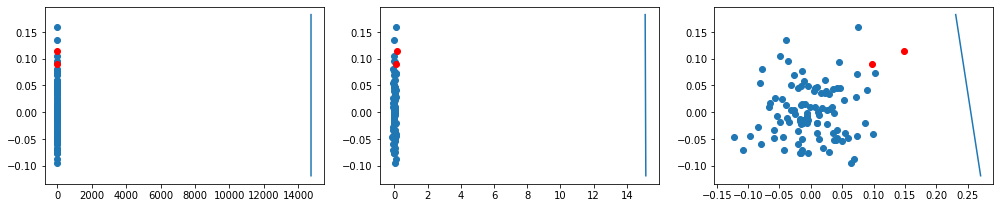

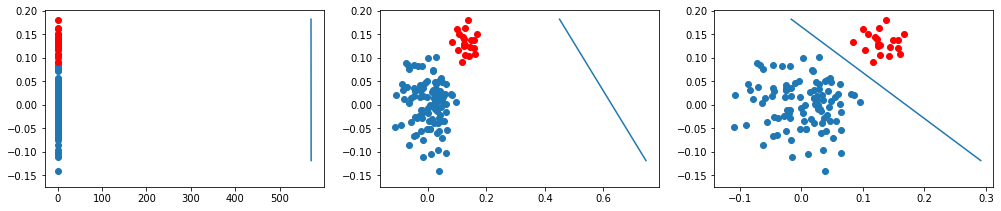

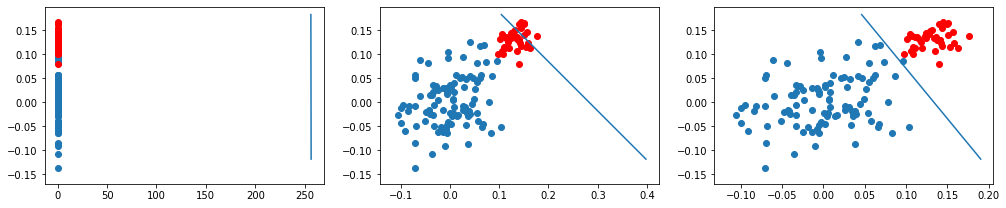

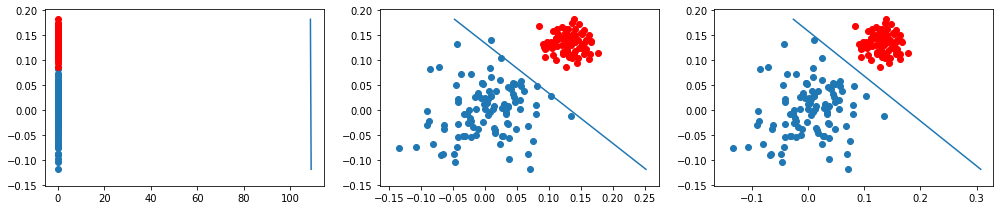

In [8]:
from sklearn.svm import SVC

C = [0.001,1,100]
cnt = 0
for i in range(0,4):
    plt.figure(figsize=(17,15))

    for c in C:
        cnt+=1
        
        clf1 = SVC(C=c,kernel='linear')
        plt.subplot(4,3,cnt)

        clf1.fit(Xd[i],Yd[i])
        plt.scatter(Xd_p[i][:,0],Xd_p[i][:,1])
        plt.scatter(Xd_n[i][:,0],Xd_n[i][:,1],color='red')
        draw_line(clf1.coef_[0],clf1.intercept_,min(X[:,1]),max(X[:,1]))

        
    

### Observations from the Graph:

1. As seen in the above graphs, when hyper-parameter(C) is very small(C=0.001) no matter what the data distribution is the hyper-plane is parallel to y-axis and doesn't classify the data points. The model is **highly underfit** in plots 1\*1, 2\*1, 3\*1, 4\*1. 

2. Even when the hyper-parameter changes from 0.001 to 100 as seen in the first row, the hyper-plane doesn't perform well for highly unbalanced data (i.e. 100:2). Even here the models are **highly underfit** as seen in the plots 1\*1, 1\*2, 1\*3.

3. The model seems to perform well for higher hyper-parameter values. i.e when the hyper paramter is 100 and data is unbalanced at 100:20. It performs significatnly well as seen in plot 2\*3.

4. On increasing the hyper-parameter(C) for 100:2 datal, it may overfit the data as there are only two negatieve points.

5. The hyper-planes amlost perfectly classify the points when C is high with decently balacned data as seen in plot 2\*3, 3\*3, 4\*2, 4\*3.  

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

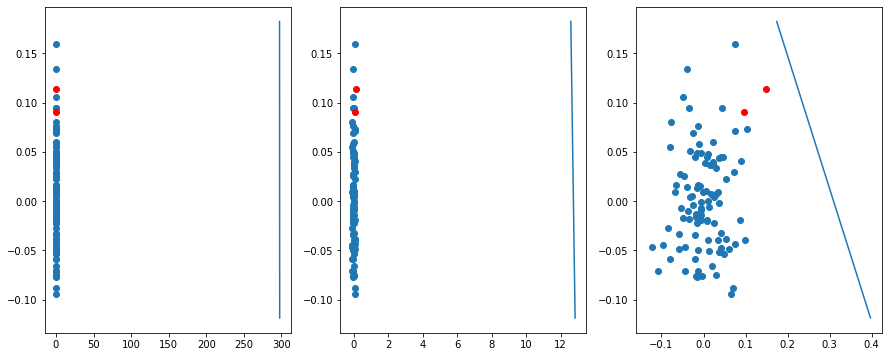

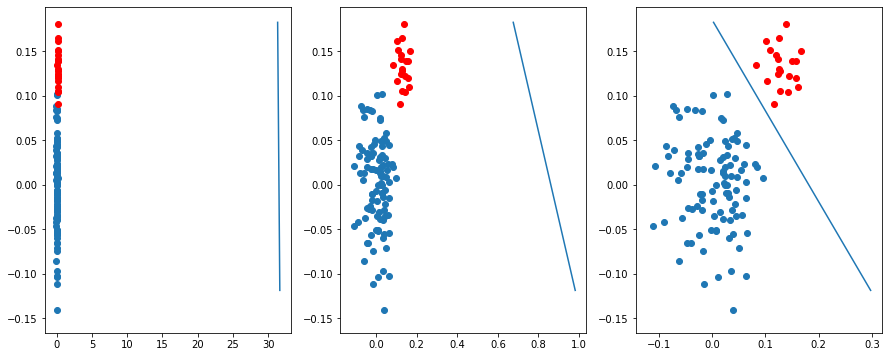

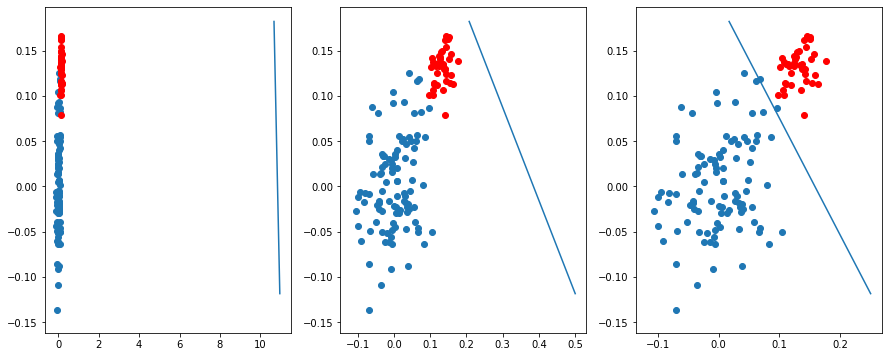

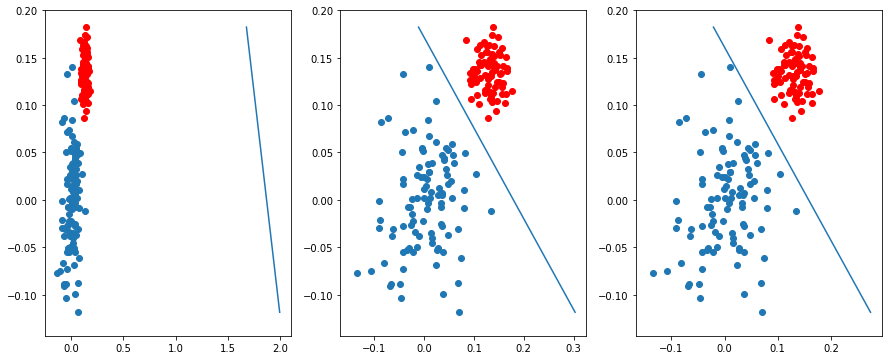

In [17]:
from sklearn.svm import SVC

C = [0.001,1,100]
cnt = 0

for i in range(0,4):
    plt.figure(figsize=(15,6))

    cnt = 0
    for c in C:
        cnt+=1
        clf1 = LogisticRegression(C=c)

        clf1.fit(Xd[i], Yd[i])
        plt.subplot(1,3,cnt)
        plt.scatter(Xd_p[i][:,0],Xd_p[i][:,1])
        plt.scatter(Xd_n[i][:,0],Xd_n[i][:,1],color='red')
        #print(clf1.intercept_)
        draw_line(clf1.coef_[0],clf1.intercept_,min(X[:,1]),max(X[:,1]))

        

        
    

Observations are same as done for SVM.

### 8B_LR_SVM

In [14]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [15]:
data = None
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [16]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [18]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [19]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [20]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

### Task 1

In [21]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X,Y)

print(clf)
print(abs(clf.coef_))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[8.89638113e-04 1.04169461e-05 1.95668016e+00]]


In [22]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(loss='log')
clf.fit(X, Y)

print(clf)
print(clf.coef_)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[[  5654.1263232  -26272.1029391   10077.92103409]]


Here feature f3 has the highest importance. As seen its the one which is highly correlated to y with 0.8 hihghest of all three features. Hence highest importance 

### Task 2

In [23]:

names = data.columns
scaler =  StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=names)

print(scaled_data.head())

         f1        f2        f3    y
0 -0.423126 -1.555602  0.181651  1.0
1 -2.520394 -0.517290 -0.200648  1.0
2 -0.002139  0.300020 -1.567659 -1.0
3  0.726209  1.365930 -1.338565 -1.0
4 -1.599662 -0.892703 -1.072608 -1.0


In [24]:
x=scaled_data[['f1','f2','f3']].values
y=scaled_data['y'].values

clf = LogisticRegression(solver='lbfgs')
clf.fit(x,y)

print(clf)
print(abs(clf.coef_))
data.corr()['y']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[0.24105483 0.07588845 3.90356899]]


f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [25]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(loss='log')
clf.fit(x, y)

print(clf)
print(clf.coef_)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[[ 2.0043128   0.44306316 10.73562009]]


Here feature f3 has the highest importance. As seen its the one which is highly correlated to y with 0.8 hihghest of all three features. Hence highest importance 

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

### 8C_LR_SVM

## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [26]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [27]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

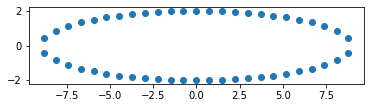

In [28]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [29]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

In [30]:
def draw1(m,b,mi,ma):
    x = np.linspace(-10,15)
    y = (m*x) + b
    
    
    plt.plot(x,y)

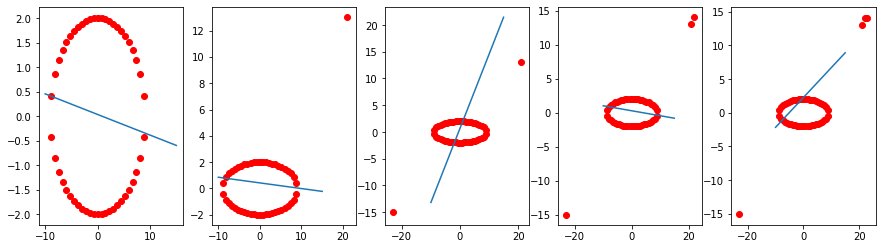

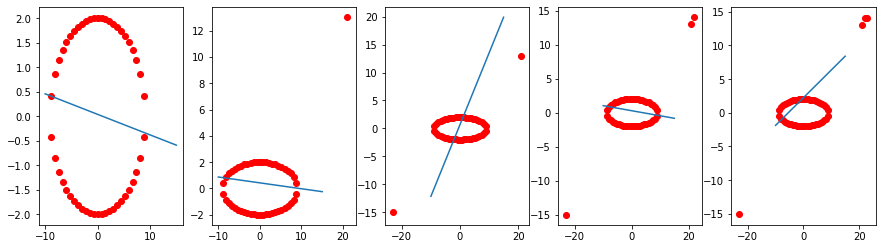

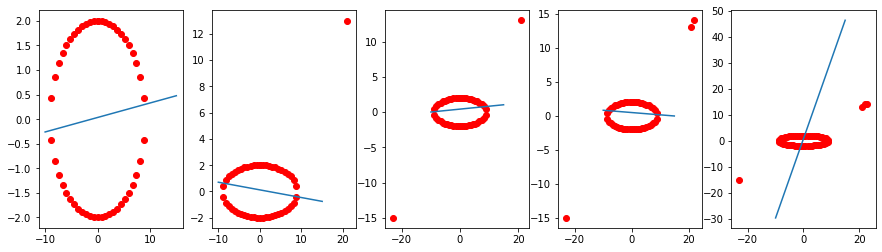

In [31]:
from sklearn import linear_model

alpha=[0.0001, 1, 100] 

outlier =  [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]


for i in alpha:
    plt.figure(figsize = (15,4))
    plot = 1
    X= b * np.sin(phi)
    Y= a * np.cos(phi)
        
    for j in outlier:
        

        
        X = np.append(X,j[0]).reshape(-1,1)
        Y = np.append(Y,j[1]).reshape(-1,1)
        
        clf = linear_model.SGDRegressor(alpha = i,learning_rate='constant',random_state=0,max_iter=1000, tol=1e-3)
        
        clf.fit(X,Y)

        
        plt.subplot(1,5,plot)
       
        plot+=1
        
        draw1(clf.coef_,clf.intercept_,np.min(X),np.max(X))
        plt.scatter(X,Y,color='red')
    plt.show()
        
        




The above plot shows how models are affected due to outliers.
The first row is when hyper-parameter is really small(0.001) the plane is hihgly influenced by outliers, as the hyper-parameters increases the effect of hyper-parameters is comparatively lesser. 

### 8D_LR_SVM 

## Task-D: Collinear features and their effect on linear models

In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('task_d.csv')

In [34]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [35]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

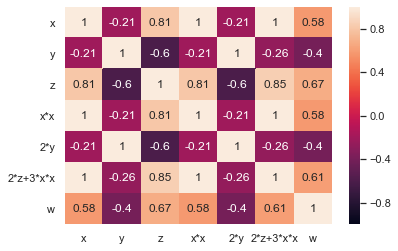

In [36]:
data = data.drop(['target'], axis=1)

f = data.columns.values
df = pd.DataFrame()
for i in f:
    df[i] = data.corr()[i]
    
#heat map of correlation
import seaborn as sns; sns.set()

ax = sns.heatmap(df,annot=True, vmin=-1,vmax=1)

### Logistic Regression

In [37]:
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

#logistic regression model
clf =  LogisticRegression(random_state=0, tol=1e-5)

parameters = {'C':[0.0001,0.001,0.01,1,10,100,1000]}
classifier = GridSearchCV(clf,parameters,cv=3,return_train_score = True,scoring='roc_auc')

best_model = classifier.fit(X,Y)

results = pd.DataFrame.from_dict(classifier.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005156,0.007292,0.049866,0.070521,0.0001,{'C': 0.0001},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.001,{'C': 0.001},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.01,{'C': 0.01},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
3,0.000000,0.000000,0.000000,0.000000,1,{'C': 1},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
4,0.000000,0.000000,0.005219,0.007381,10,{'C': 10},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
5,0.005209,0.007366,0.000000,0.000000,100,{'C': 100},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
6,0.000000,0.000000,0.000000,0.000000,1000,{'C': 1000},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


In [38]:
#getting best hyper-parameter

best_c = best_model.best_estimator_.get_params()['C']
best_c

0.0001

In [39]:
#training model based on best hyper-parameter
best_model_1 = LogisticRegression(C = best_c,random_state=0, tol=1e-5)

best_model_1.fit(X,Y)



LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=1e-05, verbose=0,
                   warm_start=False)

In [40]:
from sklearn.metrics import accuracy_score

y_predict = best_model_1.predict(X)

score = accuracy_score(Y,y_predict)
print("Accuracy Score: ",score)

print("Coefficients",best_model_1.coef_)

Accuracy Score:  1.0
Coefficients [[ 0.00359629 -0.00341974  0.00479981  0.00355269 -0.00341974  0.00377694
   0.00316971]]


In [41]:
#adding noise to the data

e = 5*( 10**-2)
print(e)
data['x'] = data['x']+e

data.head()

0.05


,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.531066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277
1,-0.844309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364
2,-1.157552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738
3,-1.314174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720
4,-0.687687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054


In [42]:
#traning based on new data

X = data.values

best_model_2 = LogisticRegression(C = best_c,random_state=0, tol=1e-5)

best_model_2.fit(X,Y)



from sklearn.metrics import accuracy_score

y_predict = best_model_2.predict(X)

score = accuracy_score(Y,y_predict)
print("Accuracy Score: ",score)

print("Coefficients",best_model_2.coef_)

Accuracy Score:  1.0
Coefficients [[ 0.00359627 -0.00341974  0.00479981  0.00355269 -0.00341974  0.00377694
   0.00316971]]


In [43]:
#difference between the two nodels
abs(best_model_1.coef_ - best_model_2.coef_)

array([[2.23390666e-08, 2.27418301e-12, 2.29718102e-11, 5.80318510e-11,
        2.27418301e-12, 5.50026422e-11, 3.94801548e-11]])

In [44]:
print("The features with highest change in coef are x,x*x,2*z+3*x*x")

The features with highest change in coef are x,x*x,2*z+3*x*x


### Linear SVC


In [45]:
data = pd.read_csv('task_d.csv')

In [46]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [47]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [48]:
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC


clf =  LinearSVC(random_state=0, tol=1e-5)

parameters = {'C':[0.0001,0.001,0.01,1,10,100,1000]}
classifier = GridSearchCV(clf,parameters,cv=3,return_train_score = True,scoring='roc_auc')

best_model = classifier.fit(X,Y)

results = pd.DataFrame.from_dict(classifier.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.0,0.0,0.005207,0.007364,0.0001,{'C': 0.0001},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.000000,0.000000,0.001,{'C': 0.001},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.000000,0.000000,0.01,{'C': 0.01},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.010415,0.007364,1,{'C': 1},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.000000,0.000000,10,{'C': 10},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
5,0.0,0.0,0.005208,0.007365,100,{'C': 100},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
6,0.0,0.0,0.002177,0.003079,1000,{'C': 1000},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


In [49]:
best_c = best_model.best_estimator_.get_params()['C']
best_c

0.0001

In [50]:
best_model_1 = LinearSVC(C = best_c,random_state=0, tol=1e-5)

best_model_1.fit(X,Y)



LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [51]:
from sklearn.metrics import accuracy_score

y_predict = best_model_1.predict(X)

score = accuracy_score(Y,y_predict)
print("Accuracy Score: ",score)

coef1 = best_model_1.coef_
print("Coefficients",coef1)

Accuracy Score:  1.0
Coefficients [[ 0.01323056 -0.01280974  0.01791372  0.01305589 -0.01280974  0.01391318
   0.01167827]]


In [54]:
e = 5*( 10**-2)
print(e)
data['x'] = data['x']+e

data.head()

0.05


,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.481066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.794309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.107552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.264174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.637687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [55]:
X = data.drop(['target'], axis=1).values


best_model_1.fit(X,Y)

from sklearn.metrics import accuracy_score

y_predict = best_model_1.predict(X)

score = accuracy_score(Y,y_predict)
print("Accuracy Score: ",score)

coef2 = best_model_1.coef_
print("Coefficients",coef2)

Accuracy Score:  1.0
Coefficients [[ 0.01322802 -0.01280974  0.01791376  0.01305594 -0.01280974  0.01391323
   0.0116783 ]]


In [56]:
# change in coef
abs(coef1-coef2)

array([[2.54573671e-06, 8.98814287e-09, 3.84229654e-08, 4.78770767e-08,
        8.98814287e-09, 4.77287001e-08, 2.73440430e-08]])

In [57]:
print("The features with highest change in coef are x,x*x,2*z+3*x*x")

The features with highest change in coef are x,x*x,2*z+3*x*x


### 8E_F_LR_SVM 

<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [58]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [59]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)



### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [60]:
#model training 

from sklearn.svm import SVC

gamma = 0.001

clf = SVC(gamma=gamma, C=100)
clf.fit(X_train, y_train)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
# you can write your code here
import math
from scipy.spatial import distance
from tqdm import tqdm


#kernel function
def k(a,b,gamma):
    return math.exp(-gamma * ((np.linalg.norm(a - b))**2))
    
#decision function
    
def decision_fn(X_cv,support_vectors,gamma,intercept):
    res =[]
    for x in tqdm(range(len(X_cv))):
        sum1 = 0
        for i in range(len(support_vectors)):
            sum1 += ( coef[i] * k(support_vectors[i],X_cv[x],gamma))
        res.append(sum1+ intercept)
    
    return res
        
        
        

In [62]:
support_vectors = clf.support_vectors_ #x
coef = clf.dual_coef_[0] #a
intercept = clf.intercept_ #intercept

result = decision_fn(X_cv,support_vectors,gamma,intercept)


100%|██████████| 1000/1000 [00:07<00:00, 135.70it/s]


In [63]:
original_res = clf.decision_function(X_cv)

#comparing sklearn reults with my decision function
for i in range(10):
    print(result[i],original_res[i])

[0.55977303] 0.5597730336711121
[-0.67424513] -0.6742451258949788
[-1.64316814] -1.6431681402584903
[-1.14829038] -1.1482903795125399
[0.74235578] 0.7423557827701527
[-3.09815055] -3.0981505453483695
[1.59561552] 1.5956155228649092
[-1.82315215] -1.823152147105782
[-1.84073925] -1.840739246932566
[2.02307635] 2.023076350703553


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [64]:
#Patt-scale values 
def pos_neg(x):
    p,n=0,0
    for i in x:
        if i ==0:
            n += 1
        else:
            p += 1
            
    y_p = (p+1)/(p+2)
    y_n = 1/(n+2)
    
    return y_p, y_n

y_pos, y_neg = pos_neg(y_cv)


def caliber(x):
    y_cv = []
    
    for i in x:
        if i == 0:
            y_cv.append(y_neg)
        else:
            y_cv.append(y_pos)
    return np.array(y_cv)


calib_cv = caliber(y_cv)


In [65]:
#SGD algorithm implementation
w = np.zeros_like(result[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(result)

import math
# you can free to change all these codes/structure
def compute_log_loss(y_train,pred):
    sum1 = 0
    for i in range(len(pred)):
    
        sum1 += ((y_train[i] * math.log(pred[i])) + ((1-y_train[i]) * math.log((1-pred[i]))))
    
    loss = (-sum1/len(y_train))
    return loss


def sigmoid(x,w,b):
    return (1/(1+np.exp(-(np.dot(x,w)+b))))


def predict(X_train,w,b):
    pred = []

    for i in range(len(X_train)):
         pred.append(sigmoid(X_train[i],w,b))
    
    return pred

train_loss = []


#print(pred[:5])
train_pred = predict(result,w,b)

#Computing log-loss        
train_loss.append(compute_log_loss(calib_cv,train_pred))
print(train_loss[0])

import random

for epoch in (range(100)):
    for i in range(N):
        batch = random.randrange(1,N)
        
        w = (( 1 - ( (alpha*eta0)/N) ) * w ) + ( (alpha*result[batch]) * ( calib_cv[batch] - sigmoid( result[batch],w, b) ) )
        #w = (1 - ( (alpha * eta0)/N ) * w ) + ( ( alpha * X_train[batch] ) * ( y_train[batch] - sigmoid(X_train[batch],w,b ) ) )
        #b = b + (alpha * (y_train[batch] - sigmoid(X_train,w,b))) 
        b = (b - ( alpha * ( -(calib_cv[batch]) + sigmoid(result[batch],w, b) ) ))

    
    y_train_ep = predict(result,w,b)
    
    
    train_loss.append(compute_log_loss(calib_cv,y_train_ep))
    
    
    print("Epoch",epoch,"train_loss",train_loss[-1:])
        
        





0.6931471805599322
Epoch 0 train_loss [0.6059160966641809]
Epoch 1 train_loss [0.5392980942295107]
Epoch 2 train_loss [0.4870289457710153]
Epoch 3 train_loss [0.44663759304613876]
Epoch 4 train_loss [0.41646292383248557]
Epoch 5 train_loss [0.3908878498150094]
Epoch 6 train_loss [0.3699037297022318]
Epoch 7 train_loss [0.3525869085818247]
Epoch 8 train_loss [0.33728070645111274]
Epoch 9 train_loss [0.3251919371990947]
Epoch 10 train_loss [0.3143372815404678]
Epoch 11 train_loss [0.3048187241404268]
Epoch 12 train_loss [0.29615473599542086]
Epoch 13 train_loss [0.28943382543384555]
Epoch 14 train_loss [0.2827182851335746]
Epoch 15 train_loss [0.27716409070834347]
Epoch 16 train_loss [0.27209437796724495]
Epoch 17 train_loss [0.267162413656628]
Epoch 18 train_loss [0.26300048282931443]
Epoch 19 train_loss [0.25935229926864073]
Epoch 20 train_loss [0.2559235528366084]
Epoch 21 train_loss [0.2527764596892149]
Epoch 22 train_loss [0.24968174805869725]
Epoch 23 train_loss [0.2470179402680571

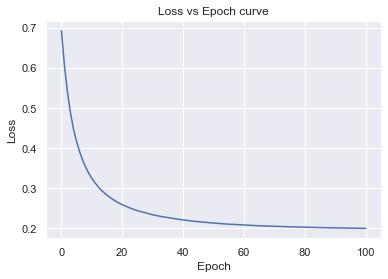

In [66]:
epoch = range(0,101)
plt.plot(epoch,train_loss)
plt.title("Loss vs Epoch curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [67]:
#w and b after 100 iterations 
print("W",w,"B",b)

W [1.43964229] B -0.14507578735111734


In [68]:
#Getting values of f_test using decision function
f_test = decision_fn(X_test,support_vectors,gamma,intercept)

100%|██████████| 1000/1000 [00:07<00:00, 141.84it/s]


In [69]:
#Probability scores
P = []
for i in range(len(X_test)):
    ans = 1/(1+math.exp(-w*f_test[i]*b))
    P.append(ans)
    
P[:5]

[0.43903217786010157,
 0.5883854345890577,
 0.37245483288659686,
 0.4245054744963932,
 0.5634880055834449]

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
